# Twitter Sentiment Capstone

**Author: Mohamed Emran**

**Date: 6/26/2023**

# Notebook 1 - Data Cleaning and EDA

## Table of Contents

1. [Introduction](#1.-Introduction) <br>
    - Objective of project
    - What potential business value does this project bring?
    - How will this project help/have an impact:
2. [Data Collection](#2.-Data-Collection)
    - Source of the data
    - Data dictionary
3. [Data Wrangling](#3.-Data-Wrangling)
    - Load the data
    - Data Cleaning
4. [EDA](#4.-EDA)
    - Data Distribution
5. [Conclusion](#5.-Conclusion)

## 1. Introduction

### Objective of project:

I aim to build an effective machine learning model to identify any negative tweets posted on Twitter

### What potential business value does this project bring?

This project aims to reduce negative feedback in real-time in a very short manner. Addressing the negative feedback demonstrates their commitment to customer service and satisfaction.

### How will this project help/have an impact:

- Help to save time and effort by addressing issues in a quickly manner.
- Hopefully to be able to integrate the model to training to identify the negative reviews and address it to a customer service.

---
## 2. Data Collection

#### Source of the data

http://help.sentiment140.com/for-students/

"Sentiment140 was created by Alec Go, Richa Bhayani, and Lei Huang, who were Computer Science graduate students at Stanford University."

#### Data dictionary:

| Column Name |                      Description                     | Data Type |
|:-----------:|:----------------------------------------------------:|-----------|
|      Id     |              The id of the tweet (2087)              |   int64   |
|     Date    | The date of the tweet (Mon Apr 06 22:19:45 UTC 2009) |   object  |
|     Flag    |  If there is no query, then this value is NO_QUERY.  |   object  |
|     User    |        The user that tweeted (robotickilldozr)       |   object  |
|    Tweet    |          The text of the tweet (Lyx is cool)         |   object  |
|  Sentiment  |   Sentiment Identifier (0 = Negative, 4 = Positive)  |   int64   |

In [2]:
# Importing several libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.options.display.max_colwidth = 1000

---
## 3 - Data Wrangling

### Load the data:

In [6]:
# Read the data file
df = pd.read_csv("data/twitter_data_emotions.csv", header=None, encoding='latin-1')

In [7]:
# sanity check - data after 
df.head(2)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!


### Data Cleaning

    - Check Shape of the data (rows and columns)
    - Check info (column names and data types)
    - Check null values
    - check duplicate values

In [8]:
# lets explore the data
df.columns = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [67]:
df.tail()

,Sentiment,Id,Date,User,Tweet
1599995,1,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,1,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,1,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,1,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,1,2193602129,2009-06-16 08:40:50,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


Check the shape of the data

In [72]:
print(f'The dataframe consists of {df.shape[0]} million rows, and {df.shape[1]} columns')

The dataframe consists of 1600000 million rows, and 5 columns


In [12]:
# check the column names and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [13]:
# check null values
df.isna().sum()

Sentiment    0
Id           0
Date         0
Flag         0
User         0
Tweet        0
dtype: int64

**We don't see any Null Values**

In [14]:
# check duplicates
df.duplicated().sum()

0

We don't see any duplicate values. We can further explore in our data.

Let's check our data for every column 

In [15]:
df['User'].value_counts()

User
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: count, Length: 659775, dtype: int64

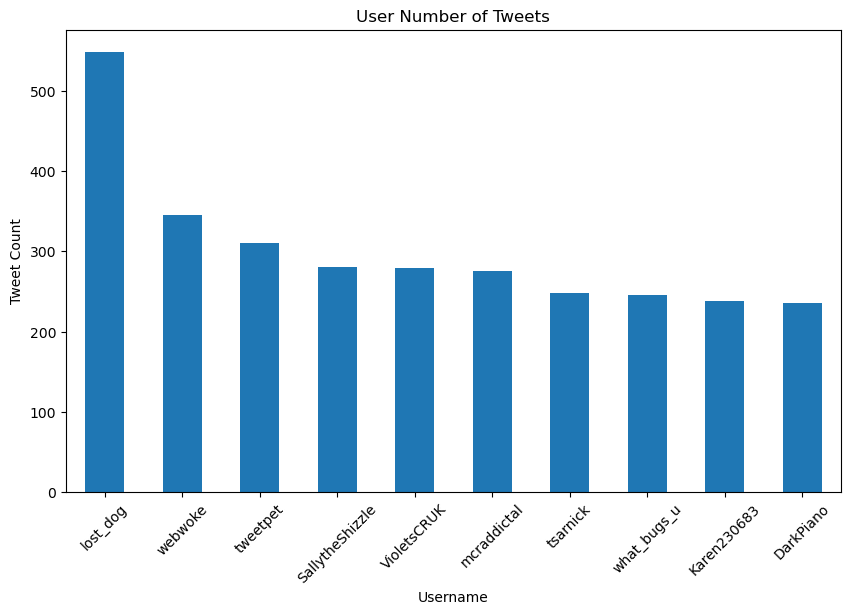

In [49]:
plt.figure(figsize=(10,6))
df['User'].value_counts().head(10).plot(kind='bar', rot=45) # bar chart
plt.title('User Number of Tweets') # title
plt.xlabel('Username') # labeling x-axis
plt.ylabel('Tweet Count') # labeling y-axis
plt.show()

We can observe that `lost_dog` user has tweeted the most with 549 tweets, than other users who tweeted. Second came `webwoke` user with 345.

Let's have a look at `Date` column

In [50]:
df['Date']

0          Mon Apr 06 22:19:45 PDT 2009
1          Mon Apr 06 22:19:49 PDT 2009
2          Mon Apr 06 22:19:53 PDT 2009
3          Mon Apr 06 22:19:57 PDT 2009
4          Mon Apr 06 22:19:57 PDT 2009
                       ...             
1599995    Tue Jun 16 08:40:49 PDT 2009
1599996    Tue Jun 16 08:40:49 PDT 2009
1599997    Tue Jun 16 08:40:49 PDT 2009
1599998    Tue Jun 16 08:40:49 PDT 2009
1599999    Tue Jun 16 08:40:50 PDT 2009
Name: Date, Length: 1600000, dtype: object

The date shows it's an `object`, we can change the data type to a `datetime` format and remove PDT from the date field

In [52]:
# removed PDT from the Date column
df['Date'] = df['Date'].str.replace('PDT', '')

In [53]:
# sanity check
df['Date']

0          Mon Apr 06 22:19:45  2009
1          Mon Apr 06 22:19:49  2009
2          Mon Apr 06 22:19:53  2009
3          Mon Apr 06 22:19:57  2009
4          Mon Apr 06 22:19:57  2009
                     ...            
1599995    Tue Jun 16 08:40:49  2009
1599996    Tue Jun 16 08:40:49  2009
1599997    Tue Jun 16 08:40:49  2009
1599998    Tue Jun 16 08:40:49  2009
1599999    Tue Jun 16 08:40:50  2009
Name: Date, Length: 1600000, dtype: object

All good `PDT` are removed from the value. Let's change the data type

In [54]:
# converts to date and time
df["Date"] = pd.to_datetime(df["Date"])

In [55]:
# sanity check converted to date and time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Sentiment  1600000 non-null  int64         
 1   Id         1600000 non-null  int64         
 2   Date       1600000 non-null  datetime64[ns]
 3   Flag       1600000 non-null  object        
 4   User       1600000 non-null  object        
 5   Tweet      1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


Since we have a 1.6 million of rows data, let's have a look at how many years the data consist of

In [92]:
df['Date'].dt.year.value_counts()

2009    1600000
Name: Date, dtype: int64

It seem's our data only consist in year `2009`

Let's have a look at `Flag` column

In [56]:
df['Flag'].value_counts()

Flag
NO_QUERY    1600000
Name: count, dtype: int64

`Flag` column doesn't seem to have any value. So we can drop the column

In [57]:
# dropping column Flag
df = df.drop(columns='Flag')

In [68]:
# sanity check
df.head(1)

,Sentiment,Id,Date,User,Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"


By checking the data frame, we have successfully dropped the `Flag` column

Let's have a look at `Sentiment` column and see if our data is balanced or imbalance

In [60]:
df['Sentiment'].value_counts()

Sentiment
0    800000
4    800000
Name: count, dtype: int64

WOW!! we have a balanced dataset, Let's change the value to binary `1` and `0`

In [61]:
df["Sentiment"] = np.where(df["Sentiment"] == 4, 1, 0)

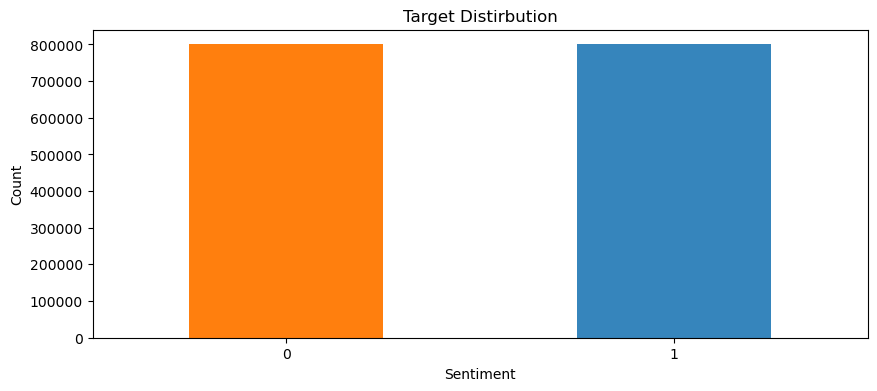

In [62]:
plt.figure(figsize=(10,4))
df['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

As we observe the graph above we have a balanced data set.

Let's have a look at `Id` column

In [94]:
df['Id'].value_counts()

2190457769    2
1972193428    2
1989776729    2
1989776908    2
1564543229    2
             ..
2197311196    1
2197311146    1
2197310899    1
2197310477    1
2193602129    1
Name: Id, Length: 1598315, dtype: int64

It might seem some tweets are duplicated. Let's proof that and show if there are any duplicated Tweet.

In [96]:
print(f'Id columns duplicate values: {df["Id"].duplicated().sum()}')
print(f'User columns duplicate values: {df["User"].duplicated().sum()}')
print(f'Tweet columns duplicate values: {df["Tweet"].duplicated().sum()}')

Id columns duplicate values: 1685
User columns duplicate values: 940225
Tweet columns duplicate values: 18534


We can see there are `1,685` duplicated tweets as per `Id` column

In [84]:
df[df.duplicated(subset=['Id', 'Tweet'], keep=False)]

,Sentiment,Id,Date,User,Tweet
213,0,1467863684,2009-04-06 22:33:35,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
275,0,1467880442,2009-04-06 22:38:04,iCalvin,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
989,0,1468053611,2009-04-06 23:28:09,mariejamora,@hellobebe I also send some updates in plurk but i upload photos on twitter! you didnt see any of my updates on plurk? Zero?
1177,0,1468100580,2009-04-06 23:42:57,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff
1254,0,1468115720,2009-04-06 23:48:00,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss you so much on the MFC but hope we can talk later on today kisses :huglove:
...,...,...,...,...,...
1598780,1,2193278017,2009-06-16 08:14:22,janiecwales,"oh dear HH is back please twitter do something about her. I'm begging you, please pretty please"
1599298,1,2193403830,2009-06-16 08:24:44,lauren__x33,"english exam went okay revising for french, r.e and geography now, urrff"
1599385,1,2193428118,2009-06-16 08:26:44,bubbles00,"finally finished typing!!!! Woohoooo , still need to add graphs though"
1599440,1,2193451289,2009-06-16 08:28:37,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to join us!! u really cant? so if thurs, when &amp; where?"


The dataframe above pulls out all the duplicated `Tweets` We can take a closer look by selecting one `Id` => `1467863684`

In [80]:
df[df['Id'] == 1468100580]

,Sentiment,Id,Date,User,Tweet
1177,0,1468100580,2009-04-06 23:42:57,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff
801573,1,1468100580,2009-04-06 23:42:57,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff


We can see there are duplicate tweets but having different `sentiment`. Based on the duplication of tweets above we can drop the duplicated tweet as some tweets are positive and some are negative

We can go ahead and drop the duplicated tweet

In [85]:
df.drop_duplicates(subset=['Id', 'Tweet'], inplace=True)

In [87]:
# sanity check
df["Id"].duplicated().sum()

0

We successfully dropped the duplicated `Tweets`

Let's further check the `Id` column

In [92]:
df['Id'].value_counts()

Id
1467810369    1
1965217307    1
1965217986    1
1965217981    1
1965217921    1
             ..
2196889890    1
2196879563    1
2196878643    1
2196878471    1
2193602129    1
Name: count, Length: 1598315, dtype: int64

We can ensure that we don't have any duplicate tweets as every Tweet is unique

In [93]:
print(f'Id columns duplicate values: {df["Id"].duplicated().sum()}')
print(f'User columns duplicate values: {df["User"].duplicated().sum()}')
print(f'Tweet columns duplicate values: {df["Tweet"].duplicated().sum()}')

Id columns duplicate values: 0
User columns duplicate values: 938540
Tweet columns duplicate values: 16849


We can check the duplicate values in terms of a User who tweeted 

In [95]:
user_tweet_dup = df.duplicated(subset=['User', 'Tweet']).value_counts()
user_tweet_dup

False    1594745
True        3570
Name: count, dtype: int64

In [100]:
df[df.duplicated(subset=['User', 'Tweet'], keep=False)].tail(5)

,Sentiment,Id,Date,User,Tweet
1598959,1,2193318357,2009-06-16 08:17:40,ummsistweets,cedar point with my biffs
1599353,1,2193427113,2009-06-16 08:26:38,parawhore182,Im busy. Drooling. Over this video. ;) but yeahh it does work captain! @lostducky0013
1599354,1,2193427134,2009-06-16 08:26:38,parawhore182,Im busy. Drooling. Over this video. ;) but yeahh it does work captain! @lostducky0013
1599377,1,2193427910,2009-06-16 08:26:43,ummsistweets,cedar point with my biffs
1599531,1,2193474515,2009-06-16 08:30:28,majaricious,@KhloeKardashian Definitely my Mom. And Angelina Jolie


We can see from the dataframe above there are some duplicate Tweets

In [97]:
user_tweet_dup[1]/df.shape[0]*100

0.2233602262382572

There are around `3570` duplicates that can be removed, and it's less than 1%, so we can drop it

In [101]:
df.drop_duplicates(subset=['User', 'Tweet'], inplace=True)

In [102]:
# sanity check
df.duplicated(subset=['User', 'Tweet']).value_counts()

False    1594745
Name: count, dtype: int64

**Nice!** We dropped the duplicate tweets

Next steps, let's look at `Tweet` column

In [217]:
df_clean = df.copy()

In [218]:
#sanity check - copied correctly
print(f'{df_clean.shape[0] == df.shape[0]}: The dataframe are copied correctly')

True: The dataframe are copied correctly


In [219]:
df_clean.head(1)

,Sentiment,Id,Date,User,Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"


In [220]:
df_clean[['Sentiment', 'Id']].corr()

,Sentiment,Id
Sentiment,1.000000,-0.261886
Id,-0.261886,1.000000


We observe the correlation between `Id` and `Sentiment` is not that high. Though, we can drop the column as our main focus on `Tweet` column

In [221]:
# dropping ID column
df_clean.drop(columns='Id', inplace=True)

In [222]:
# sanity check
df_clean.sample(5)

,Sentiment,Date,User,Tweet
540052,0,2009-06-16 17:45:39,pastryqueen,@bitterbiscuit breathe. I was thinking how I want a big bowl of pasta but it has to be eaten in front of your dining room window.
1199288,1,2009-05-31 16:48:11,indie_rockbaby,@tiffy3603 buy me purple and i will sallys is at eastland center
1474580,1,2009-06-07 09:13:09,Laiinne,"@tommcfly But u guys had to stay married for about a month I guess, otherwise u won't have good memories enough Tom!"
908908,1,2009-05-09 18:30:34,ohdamitzrany,KMF going smoothly so far. Free stuff is always a plus.
754206,0,2009-06-22 18:27:28,sniiitch_x3,WOWOW. way to act like you like me then ignore me. awesome.


We successfully dropped `Id` column

After looking at the `Tweet` column from the dataset. There are some cleaning steps we have to proceed in order for our model to work well:

    1. Lower casing the `Tweet`
    2. Filtering out and create a new column `Tagging`, `Hashtags`, `Emojis` 
    3. Removing punctuations, special characters (%,^,&,*), non-wording characters (ñ, ð, °, ð) and numerical values

Convert to lowercase `Tweet`

In [223]:
# Convert tweets to lower case
df_clean['Tweet'] = df_clean['Tweet'].str.lower()

In [224]:
# sanity check
df_clean['Tweet']

0          @switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d
1              is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!
2                                    @kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds
3                                                                              my whole body feels itchy and like its on fire 
4              @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there. 
                                                                  ...                                                         
1599995                                                               just woke up. having no school is the best feeling ever 
1599996                                         thewdb.com - very cool to hear old walt interviews!  â« http:/

Filtering out `Tagging` and `Hastags` by creating a new column

In [225]:
# Tagging and hastags in new column
df_clean['Tagging'] = df_clean['Tweet']\
    .apply(lambda x: ', '.join([mention.strip('@') for mention in x.split() if mention.startswith('@')]))
df_clean['Hashtags'] = df_clean['Tweet']\
    .apply(lambda x: ', '.join([hashtag.strip('#') for hashtag in x.split() if hashtag.startswith('#')]))

In [226]:
# replace an empty field to None
df_clean['Tagging'] = df_clean['Tagging'].fillna('None').replace('', None)
df_clean['Hashtags'] = df_clean['Hashtags'].fillna('None').replace('', None)

Filtering out `emojis` by creating a new column

In [227]:
# Define the emojis pattern
emojis_pattern = r'(:\) |:\]|: \)|=\)|:d|;d|:\(|:\[|:- \))'

# Add a new column to store the presence of emojis
emojis = df_clean['Tweet'].str.extractall(emojis_pattern).groupby(level=0).agg(','.join)
df_clean['Emojis'] = emojis if not emojis.empty else None
df_clean['Emojis'] = df_clean['Emojis'].fillna('None')

In [228]:
# sanity check
df_clean.head(5)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
0,0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",switchfoot,None,;d
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,None,None,None
2,0,2009-04-06 22:19:53,mattycus,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,kenichan,None,None
3,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,None,None,None
4,0,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",nationwideclass,None,None


We successfully created new columns. We can observe some None fields, which we will discover later in this notebook

We will start by cleaning special characters

In [229]:
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&quot;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&amp;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&gt;", ' ', regex=True)
df_clean['Tweet'] = df_clean['Tweet'].str.replace(r"&lt;", ' ', regex=True)

In [230]:
df_clean[df_clean['User'] == 'c0der']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
1471948,1,2009-06-07 08:18:30,c0der,ð³ñ. twitter ñð°ð±ð¾ñð°ðµñ ð¸ ð¿ð¾ https,None,None,None


It seems there are alot of unknown characters which might be in another language or an emojis. I have gathered all the special characters, we can start filtering out the characters. 

In [231]:
df_clean.drop(df_clean[df_clean['Tweet'].str.contains(r'ñ||å||§|ù||¹|¡|³|ã|©|®|â|¬|î|±|ä|°|ð|ç||é|ì|²|\
                                    ¢|×|¨|æ|¸|ë|ê|»|¶|à|¼|¾||£|')].index, inplace=True)

In [232]:
# sanity check using regex 
df_clean[df_clean['Tweet'].str.contains(r'\W')].sample(5)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
618333,0,2009-06-18 13:15:11,CharlesMurphyVI,sorry this is the article http://tinyurl.com/mewdm3,None,None,None
623739,0,2009-06-18 16:01:58,Canterk2008,just got back from taking my little chihuahua to the vet. poor little guy was bit by a rattlesnake and has to spend the night at the vets,None,None,None
503136,0,2009-06-15 20:44:17,Geo31107,"so many problems right now, first her doubt and now two friends that i care about hate me. i wanna die right now!",None,None,None
702905,0,2009-06-20 11:25:10,mamakin915,@slayerofman happy father's day sweetee...mama misses you too much.,slayerofman,None,None
512795,0,2009-06-16 02:07:11,goober925,i guess i'm not driving my car for awhile,None,None,None


We got successfully removed the non-wording characters, applied by using a regex command `\W`.

In [233]:
df_clean[df_clean['Tweet'].str.contains(r'[^a-z ]')].sample(2)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
1252364,1,2009-06-01 15:31:19,marienborg,man i would kill for a banana right about now to much sweet break snacks #atlassiansummit,None,atlassiansummit,None
962819,1,2009-05-17 10:36:28,ShaynaMarisa_24,@ptswagga heeeyyyy whats up,ptswagga,None,None


Let's create a function in order to remove the special characters, Urls, and hastags

In [234]:
# Importing a library
import string
import preprocessor as p

# Defining the function
def clean_tweets(df_clean):
    # Set up punctuations we want to be replaced
    removal_punctuation = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})|(\*)|(\$)|(\=)")
    pair_words = re.compile("(-)|(/)|(:).")
    tokenized_sentence = []
    for line in df_clean:
        # Send to tweet_processor
        p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG)
        tmpL = p.clean(line)
        # Removing special characters
        tmpL = removal_punctuation.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = pair_words.sub(" ", tmpL)
        tokenized_sentence.append(tmpL)
    return tokenized_sentence

In [235]:
# calling the function above
df_clean['Tweet'] = clean_tweets(df_clean['Tweet'])

In [236]:
# sanity check - removed most of punctuation, mentions, urls, and hashtags
df_clean[df_clean['Tweet'].str.contains(r'[^a-z ]')].sample(5)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
1042871,1,2009-05-28 23:57:23,enamoredsoul,thank u so muchi didnt see ur tweet until nowhave no idea how i missed itthanx 4 the followhope 2 interact w u in the future,moble,None,None
14912,0,2009-04-18 15:33:51,anclag,noooooo family guy on bbc3 for the next 3 hoursi should really go to bed at somepoint soon though and ill miss new fg tomorrow grrr,None,None,None
857251,1,2009-04-21 03:21:53,bitman,presenting a comedy show having just woken up may have been a bad idea + todays news hasnt happened yet wrap uptv,heatherstewart,None,None
1317752,1,2009-06-03 01:04:18,jahredLS,i would like to be 500000th follower but what the heck im just too star strucked to wait,neilhimself,None,None
919527,1,2009-05-10 03:42:24,tapatmywindow,keep forgetting we only need to revise one topic for the 116 exam its a nice surprise every time i remember though,None,None,None


We can still see some special characters and numerical values which we can replace with an empty field

In [237]:
# replacing rest of special characters and numerical
df_clean['Tweet'] = df_clean.loc[:, 'Tweet'].str.replace(r'[^a-z ]', ' ')

Let's have a look if our `Tweets`

In [238]:
df_clean['Tweet'].sample(5)

990309     lots of beach time yesterday rain and wind came in late clouds today but wont dampen our spirits going to state park for snorkeling
1567425                                                                                 its going on every red blooded american males wishlist
1344510                                                                                       amy is here gonna make another video later yeeee
1104259                                                                still trying to finish patricia cornwell book back to sunny garden i go
656058                                                                           i reaalllyyy need to call but i doubt shell be awake at 235am
Name: Tweet, dtype: object

It seems most are cleaned, let's double check if there are any empty tweets

In [239]:
# check for empty Tweets
df_clean[df_clean['Tweet'] == '']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
208,0,2009-04-06 22:33:25,Artiel87,,mandayyy,None,None
249,0,2009-04-06 22:36:27,Artiel87,,mandayyy,None,None
398,0,2009-04-06 22:46:53,KimberlyKane,,danadearmond,None,None
430,0,2009-04-06 22:48:48,jtmal0723,,anistorm,None,None
1011,0,2009-04-06 23:30:23,gabysslave,,citizensheep,None,None
...,...,...,...,...,...,...,...
1596542,1,2009-06-16 07:23:20,carlos_teran,,sary_chan,None,None
1596670,1,2009-06-16 07:29:14,vmslive,,catherine_smith,None,None
1597326,1,2009-06-16 07:43:42,senoritaperdida,,ashtonshay00,None,None
1599494,1,2009-06-16 08:28:48,RobNice24,,sworn4dabosses,None,None


It looks like after cleaning the Tweets some of the Tweets are missing values. There are around `3079` empty Tweets, so we can drop it.

In [240]:
df_clean = df_clean[df_clean['Tweet'] != '']

In [241]:
# sanity check
df_clean[df_clean['Tweet'] == '']

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis


Great! We managed to removed them

***We successfully cleaned our data***

----
## 4. EDA

In [242]:
df_clean.sample(2)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis
1421422,1,2009-06-06 14:41:43,HelloEli,shopping with my mum for my bar b q,None,None,None
155037,0,2009-05-27 07:25:22,BrotherReggie,hey sistah do you ever check your phone messages,dawnka,None,None


Check the shape of the data after cleaning

In [243]:
print(f'The dataframe consists of {df.shape[0]} million rows, and {df.shape[1]} columns')

The dataframe consists of 1594745 million rows, and 5 columns


### Data Distribution:

Let's check the data distirbution for each column to see if there are any interesting trends

First thing, will have a look at the distribution of the `Sentiment` class

In [244]:
df_clean['Sentiment'].value_counts()

Sentiment
0    792078
1    789169
Name: count, dtype: int64

In [245]:
df_clean['Sentiment'].value_counts(normalize=True)

Sentiment
0    0.50092
1    0.49908
Name: proportion, dtype: float64

Looks like we have a normal distribution on our dataset. Let's plot the distribution as a bar graph

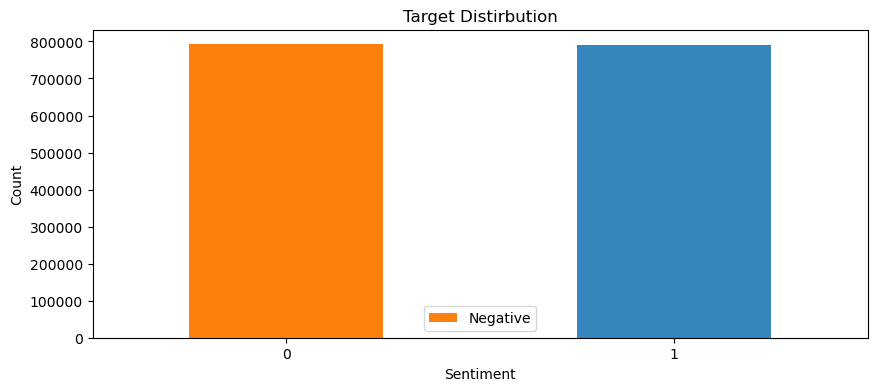

In [271]:
plt.figure(figsize=(10,4))
colors = ['#FF7F0E', '#3685BC']
labels = ['Negative', 'Positive']
df_clean['Sentiment'].value_counts().plot(kind='bar', rot=0, color=colors )
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(labels)
plt.show()

Based on the visual above, as indicated we have a normal distribution, with 50% of the data as class 1, and 49.9% as class 0.

Let's have a look at the `Date` column and see the distribution that happends during the months, day and time

In [247]:
df_clean['Date']

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599994   2009-06-16 08:39:00
1599995   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: Date, Length: 1581247, dtype: datetime64[ns]

In [248]:
# Setting Month, Day, and Year column
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['Year'] = df_clean['Date'].dt.year

# setting Hour, Minutes and Seconds column
df_clean['Hour'] = df_clean['Date'].dt.hour
df_clean['Minutes'] = df_clean['Date'].dt.minute
df_clean['Seconds'] = df_clean['Date'].dt.second

# added a day of the week column
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()

In [249]:
# sanity check - making sure the columns are created
df_clean.sample(2)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year,Hour,Minutes,Seconds,DayOfWeek
135320,0,2009-05-18 08:06:12,dontcallmedotty,i hate mondays i hate dropping michael off to go back to tims,None,None,None,5,18,2009,8,6,12,Monday
1578129,1,2009-06-16 00:52:19,MissHoejris,wish i was the one to get a hug hih you to are so cute together,darrenhayes,None,None,6,16,2009,0,52,19,Tuesday


We can go ahead and drop date column

In [250]:
df_clean.drop(columns=['Date'], inplace=True)

In [251]:
# sanity check 
df_clean.sample(2)

,Sentiment,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year,Hour,Minutes,Seconds,DayOfWeek
61037,0,ghoulscout,dropped my blackberry on the pavement ball is gone no mobile twitter for me for a hot minute,None,None,None,5,3,2009,6,2,53,Sunday
1023280,1,glodbcom,im no supperman ~ this song so cute,None,None,None,5,22,2009,7,48,0,Friday


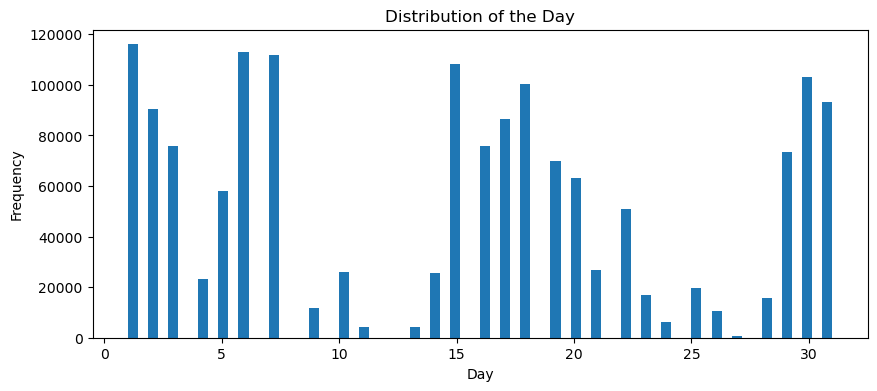

In [229]:
plt.figure(figsize=(10,4))
plt.hist(df_clean['Day'], bins=70) # histogram
plt.title('Distribution of the Day') # title
plt.xlabel('Day') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.show()

We observe in the bar chart the distribution of the days during the month. Based on the graph above the highest frequency seems around the weekends. We can look further by plotting a distribution of the `DayOfWeek` column

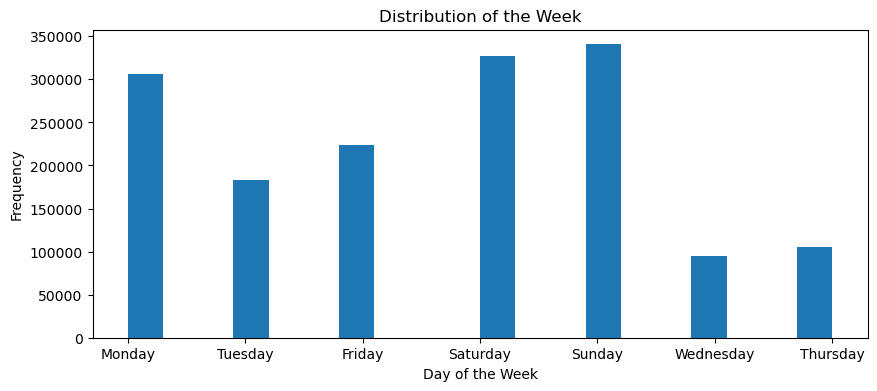

In [254]:
plt.figure(figsize=(10,4))
plt.hist(df_clean['DayOfWeek'], bins=20) # histogram
plt.title('Distribution of the Week') # title
plt.xlabel('Day of the Week') # labeling x-axis
plt.ylabel('Frequency') # labeling y-axis
plt.show()

As we observed from the bar chart above that Saturday, Sunday and Monday are the highest compare to the rest of the days of the week.

We can explore the relationship between the `DayOfWeek` and `Sentiment` columns by plotting a bar graph.

In [261]:
grouped.pivot(index='DayOfWeek', columns='Sentiment', values='Count')

Sentiment,0,1
DayOfWeek,,
Friday,113607,109861
Monday,131299,174831
Saturday,156222,171290
Sunday,144184,196421
Thursday,79227,25694
Tuesday,99924,83314
Wednesday,67615,27758


<Figure size 3500x600 with 0 Axes>

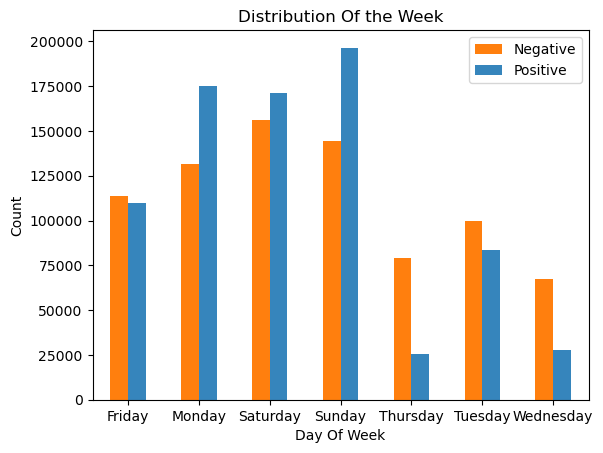

In [272]:
plt.figure(figsize=(35, 6))
grouped = df_clean.groupby(['DayOfWeek', 'Sentiment']).size().reset_index(name='Count')
colors = ['#FF7F0E', '#3685BC']
labels = ['Negative', 'Positive']
grouped.pivot(index='DayOfWeek', columns='Sentiment', values='Count').plot(kind='bar', rot=0, color=colors)
plt.title("Distribution Of the Week")
plt.xlabel("Day Of Week")
plt.ylabel("Count")
plt.legend(labels)
plt.show()

We can look from the graph that Saturday, Sunday and Monday has the highest positive sentiment compare to Friday, it shows that negative sentiment surpases, same goes with Tuesday, Wednesday and Thursday. 

It seems that Wednesday and Thursday there has been has high negative sentiment.

In [273]:
df_clean['Tagging'].value_counts()

Tagging
mileycyrus                                3900
tommcfly                                  3336
ddlovato                                  2922
jonasbrothers                             2053
davidarchie                               1214
                                          ... 
julieand                                     1
ruby225                                      1
mpits                                        1
shantymanfan                                 1
thenspcc, sparkscharity, speakinguph4h       1
Name: count, Length: 355943, dtype: int64

Let's plot the distribution of `Tagging`, to see who got tagged the most through tweets

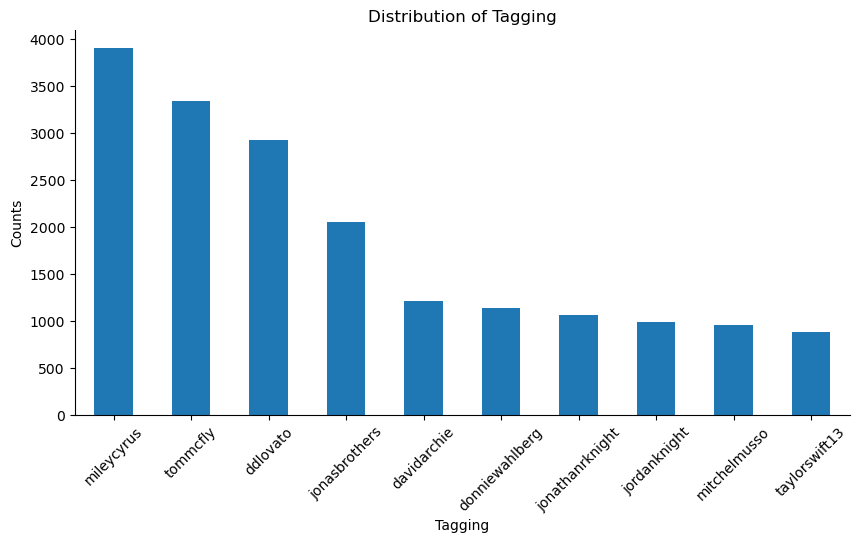

In [274]:
plt.figure(figsize=(10, 5))

df_clean['Tagging'].value_counts().head(10).plot(kind='bar', rot=45)
plt.title('Distribution of Tagging')
plt.ylabel('Counts')
plt.xlabel('Tagging')
sns.despine()

plt.show()

We can observe some celebreties that got tagged the most such as `mileycyrus` with 3,900 second came `tommcfly` who is a singer Tom Fletcher 3,336. Additional, to other celebreties `ddlovato` as Demi Lovato and Jonas Brother, Taylor Swift.

In [275]:
df_clean['Hashtags'].value_counts()

Hashtags
followfriday                                                 2032
fb                                                           1669
squarespace                                                   742
ff                                                            704
iranelection                                                  374
                                                             ... 
screwf1                                                         1
inaperfectworld, iranelection, goodpussy., gokeyisadouche       1
epicmeat, jergensmaterial                                       1
100, 37.                                                        1
bigrun                                                          1
Name: count, Length: 13959, dtype: int64

In [278]:
df_clean.groupby(['Hashtags']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Hashtags,Count
4496,followfriday,2032
4156,fb,1669
11208,squarespace,742
4221,ff,704
6447,iranelection,374
...,...,...
5180,gluttonforpunishment,1
5181,glxp,1
5182,"glyps, 30stmglyphs",1
5186,"gmail, google",1


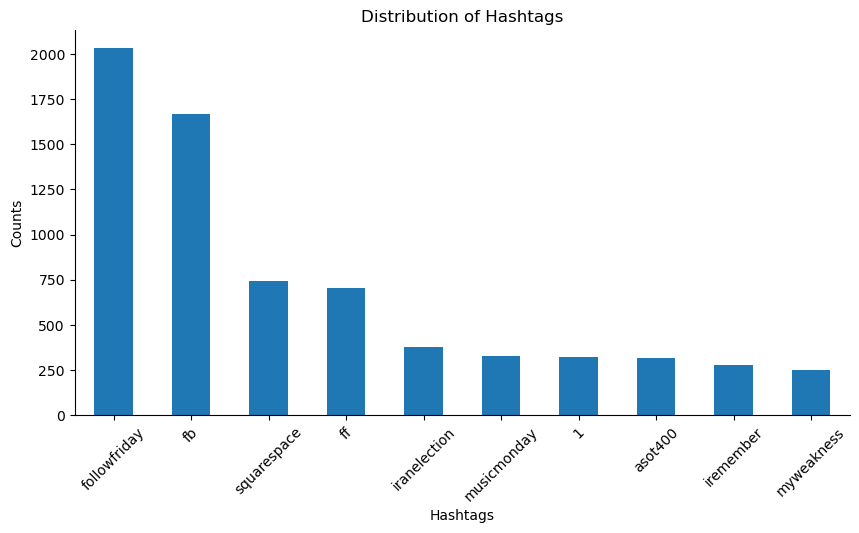

In [257]:
plt.figure(figsize=(10, 5))

df_clean['Hashtags'].value_counts().head(10).plot(kind='bar', rot=45)
plt.title('Distribution of Hashtags')
plt.ylabel('Counts')
plt.xlabel('Hashtags')
sns.despine()

plt.show()

`followfriday` Hashtags were used the most with 1590 tags, comes second `fb` which refers to Facebook 1669.

### Save Cleaned Dataset

Now that we have spent the time cleaning and working with EDA. We are going to save it to a CSV file.

In [284]:
df_clean.to_csv('cleaned_twitter_data.csv', index=False)

In [285]:
# Sanity check
pd.read_csv('cleaned_twitter_data.csv').sample(5)

,Sentiment,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,Year,Hour,Minutes,Seconds,DayOfWeek
168120,0,zellyboo,lol girl that video disturbed me and i love the hk theme too cute,sheszladii,NaN,NaN,5,29,2009,10,57,42,Friday
933194,1,nikkijonas,just got done with my religion final,NaN,NaN,NaN,5,14,2009,5,47,29,Thursday
62952,0,theteamcolours,low quality speakers ruin everything,NaN,NaN,NaN,5,3,2009,8,51,25,Sunday
549557,0,ratusyura,sandwich i miss rice havent had rice in two weeks another two weeks to go~,zalyazid,NaN,NaN,6,17,2009,0,42,51,Wednesday
102317,0,lseibs,another stormy day in the mb,NaN,NaN,NaN,5,14,2009,7,27,34,Thursday


## 5. Conclusion

To conclude this notebook, it involves data collection, cleaning and some preliminary exploration of dataset by going through EDA techniques in order to understand the data and plot meaningful insights. 

In my next notebook, I will be going for a preprocessing and set a base model using Logistic Regression